
# Exploratory Data Analysis of the Ames Housing Data

---

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

In [48]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

Examine the data. What are the datatypes and what does a sample of the dataframe look like? Are there any NaNs?

In [49]:
# Load the data
house = pd.read_csv('../housing.csv')
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [50]:
house.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
327,328,20,RL,80.0,11600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,145250
725,726,20,RL,60.0,6960,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,500,11,2009,WD,Normal,120500
400,401,120,RL,38.0,14963,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,245500
1077,1078,20,RL,NaN,15870,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2006,WD,Abnorml,138800
166,167,20,RL,NaN,10708,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,11,2009,COD,Normal,190000


## Visualizations

Create some plots to visualize the data. In this dataset, the feature 'SalePrice' is the target. Let's look at the distribution of the home sales price and see how other features relate to it.

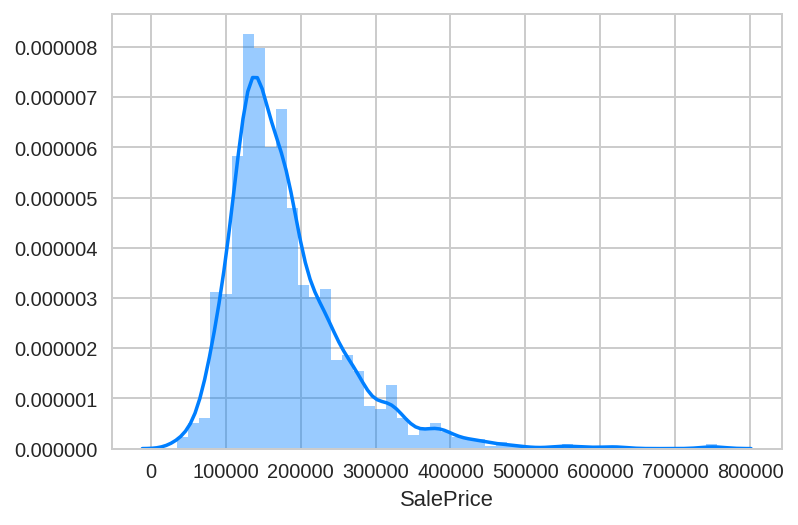

In [51]:
_ = sns.distplot(house['SalePrice'],axlabel='SalePrice')

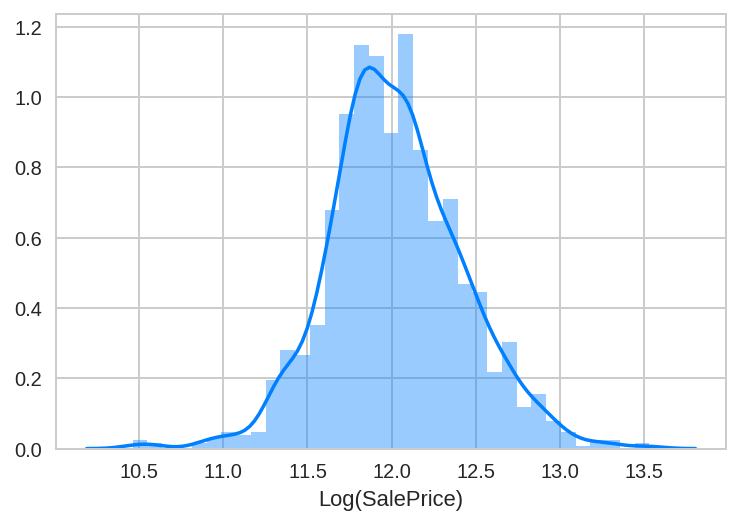

In [52]:
_ = sns.distplot(np.log(house['SalePrice']+1),axlabel='Log(SalePrice)')

We will look at a few plots to see how the various features correlate with the home's Sales Price.

I've defined a function to make composite boxplots for a given feature

In [53]:
def boxplotter(feature_name, data=house):
    sns.set(style='ticks')
    f,ax = plt.subplots(figsize=(7,6))
    # De-skew the SalePrice data for plotting
    ax.set_xscale('log')
    
    # Plot the data with horizontal boxplots
    _ = sns.boxplot(x='SalePrice', y=feature_name, data=data, whis=np.inf)
    
    # Add in points to show each observation
    _ = sns.swarmplot(x='SalePrice', y=feature_name, data=data, size=2, color='.3', linewidth=0)
    
    # Tweak the visual presentation
    ax.xaxis.grid(True)
    ax.set(ylabel="")
    ax.set(xlabel="Log(SalePrice)")
    sns.despine(trim=True, left=True)

{nan, 'RFn', 'Fin', 'Unf'}


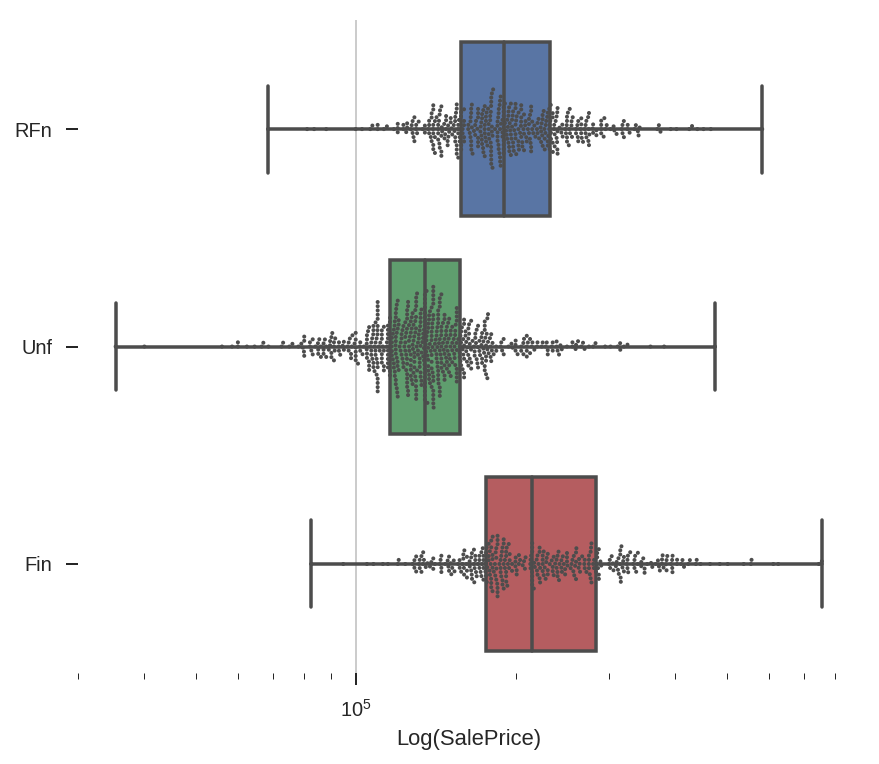

In [54]:
# Unique values in feature GarageFinish
print(set(house['GarageFinish']))
boxplotter('GarageFinish')

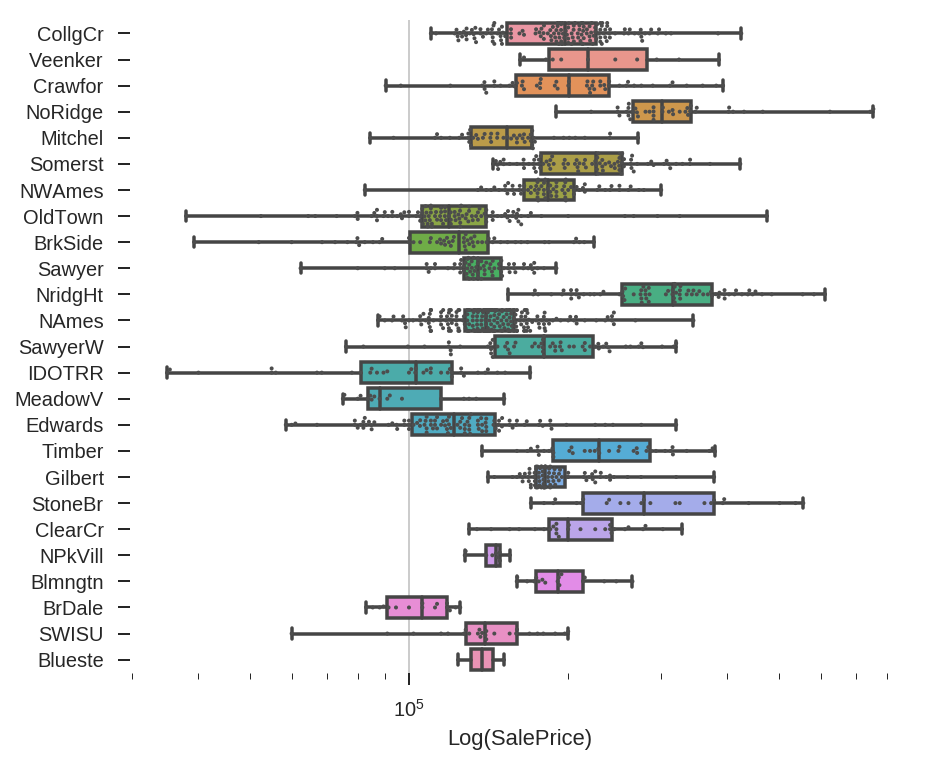

In [55]:
boxplotter('Neighborhood')

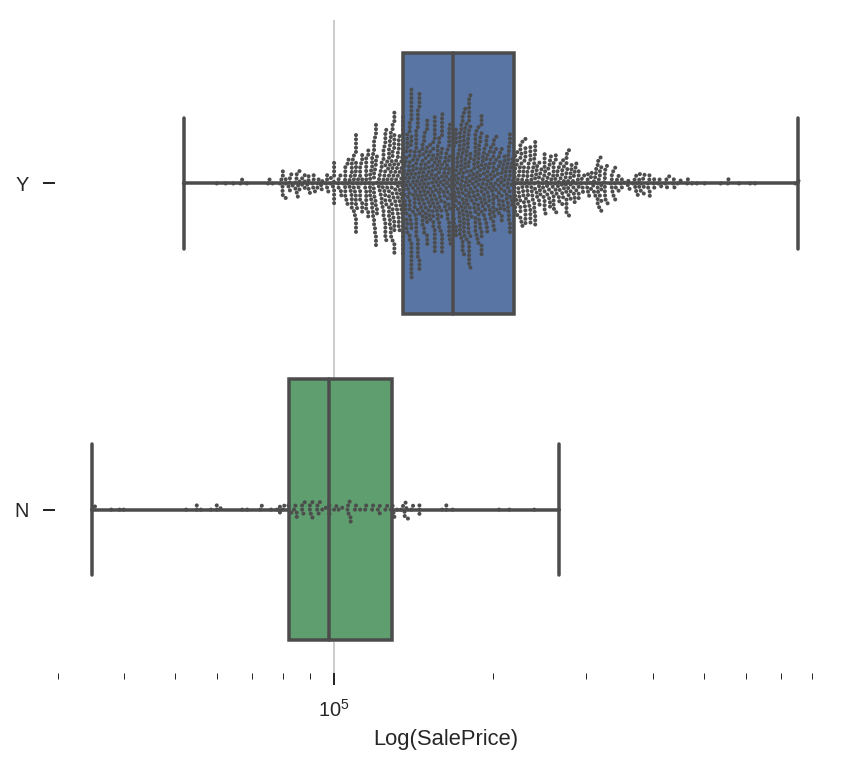

In [56]:
boxplotter('CentralAir')

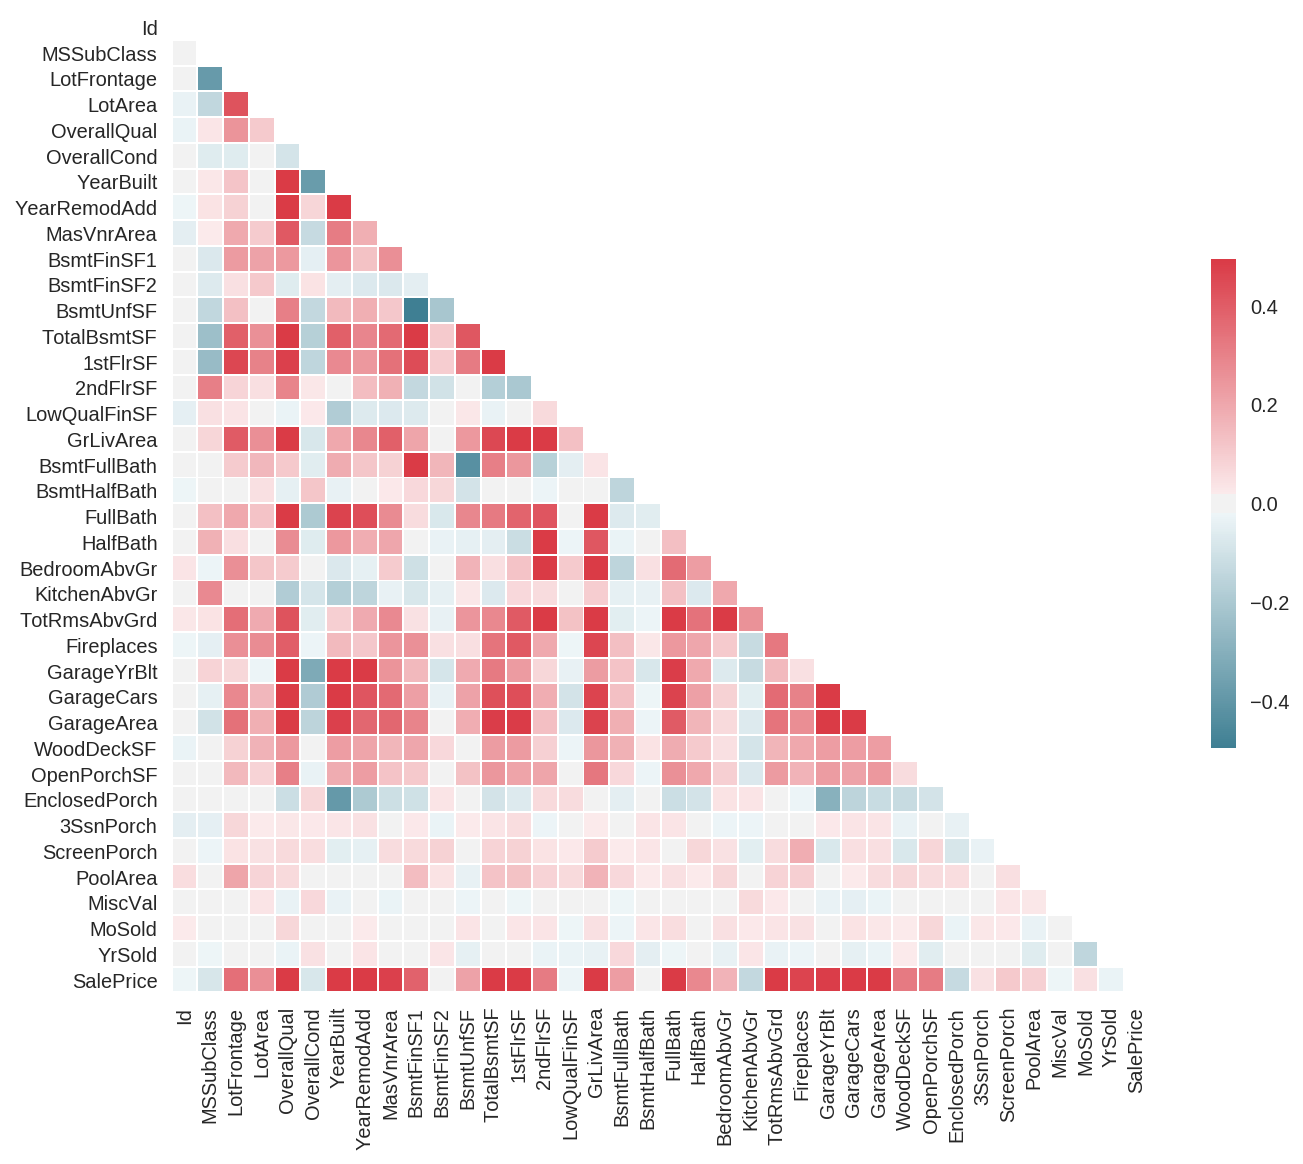

In [57]:
sns.set(style="white")

# Compute the correlation matrix
corr = house.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
_ = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=False,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Note: in practice we would only want to look at features with 'numeric' type

### Visualization Summary

The plots above gives us some initial insights to the data. We first note from the histograms of the houses' SalesPrice that the data is skewed to the left. For cleaning the data we may consider de-skewing the data by taking a log-transformation to help create better predictive models. 

The boxplots of some of the features can tell us how they might indicate a house's SalesPrice. For example in the boxplot of the houses' GarageFinish feature, which tells us what the interior of a given home's garage is (Finished, Rough Finished, Unfinished, or No Garage), we can easily see that the SalePrice of a house generally increases the 'more-finished' its garage is. Similarly, we see that houses that have CentralAir typically sell for more money. 

The third boxplot displayed also yeilds some significant insights. We are able to see that the neighborhood where the house is located strongly influences its SalePrice. From a quick glance, we see that neighborhoods like Stone Brook and Northridge Heights are probably more affluent neighborhoods and therefore the SalePrice of the homes there are greater. Contrarily, we see that homes in Briardale and Meadow Village tend to be cheaper.

The final plot is a heatmap that visualizes the correlation between all the features with each other. In the plot, the red-er the color, the more positive the correlation between the two features are, while the blue-er colors displays the more negatively correlations. Absence of color means little correlation between the features exists. Some of the correlations between the features are intuitive. For example, we see a strong correlation between the houses' YearBuilt and its OverallCond. We see some other strong correlation between the features that we should keep in mind when building a predictive model. We want to avoid colinearity between our features when building a model, so for data cleaning we may want to remove features that are strongly colinear.



## Data Cleaning

Strategy -- We can see from the data that there are 38 features that are continuous variables (ex. SalePrice, PoolArea, etc) and there are 43 features that can be considered categorical (ex. PoolQC, GarageQual, etc.). This section will convert the feature values to the appropriate data type. We will also remove NaN values from our set where appropriate. We will also de-skew any feature data where appropriate.

In [58]:
house.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
176,177,60,RL,97.0,10029,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2007,WD,Normal,211000
425,426,60,RM,60.0,3378,Pave,Grvl,Reg,HLS,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,135000
465,466,120,RM,NaN,3072,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,178740
661,662,60,RL,52.0,46589,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,402000
1352,1353,50,RM,50.0,6000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,134900


In [59]:
# Convert categorical variables
categorical_cols = []
numeric_cols = []
for feature in house.columns:
    if house[feature].dtype == 'O':
        categorical_cols.append(feature)
        house[feature] = house[feature].astype('category')
    else:
        numeric_cols.append(feature)
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null category
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null category
Alley            91 non-null category
LotShape         1460 non-null category
LandContour      1460 non-null category
Utilities        1460 non-null category
LotConfig        1460 non-null category
LandSlope        1460 non-null category
Neighborhood     1460 non-null category
Condition1       1460 non-null category
Condition2       1460 non-null category
BldgType         1460 non-null category
HouseStyle       1460 non-null category
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null category
RoofMatl         1460 non-null catego

### Numeric Feature Correlation With House SalePrice
We can see from the heatmap plotted above that many of the numeric variables correlate with one another. Our ultimate goal however is to see how well of a predictor a given feature will be with the target variable SalePrice. We will investigate this by looking at the pearson correlation coefficient of each of the numeric features independently with the SalePrice. This will tell us whether a feature should be included in our predictive model.

In [60]:
from scipy.stats import pearsonr
print('-----Features that are not strong predictors for SalePrice-----')
for feature in numeric_cols:
    corr, p_value = pearsonr(house[feature],house['SalePrice'])
    if p_value > 0.05:
        print('{}'.format(feature))
        numeric_cols.remove(feature)

-----Features that are not strong predictors for SalePrice-----
Id
LotFrontage
MasVnrArea
BsmtFinSF2
LowQualFinSF
BsmtHalfBath
GarageYrBlt
3SsnPorch
MiscVal
YrSold


Let's plot some of the remaining features to see how they correlate with the house SalePrice

In [61]:
import seaborn as sns
sns.set(style="ticks")
df = house[numeric_cols]

In [62]:
df.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'PoolArea', 'MoSold', 'SalePrice'],
      dtype='object')

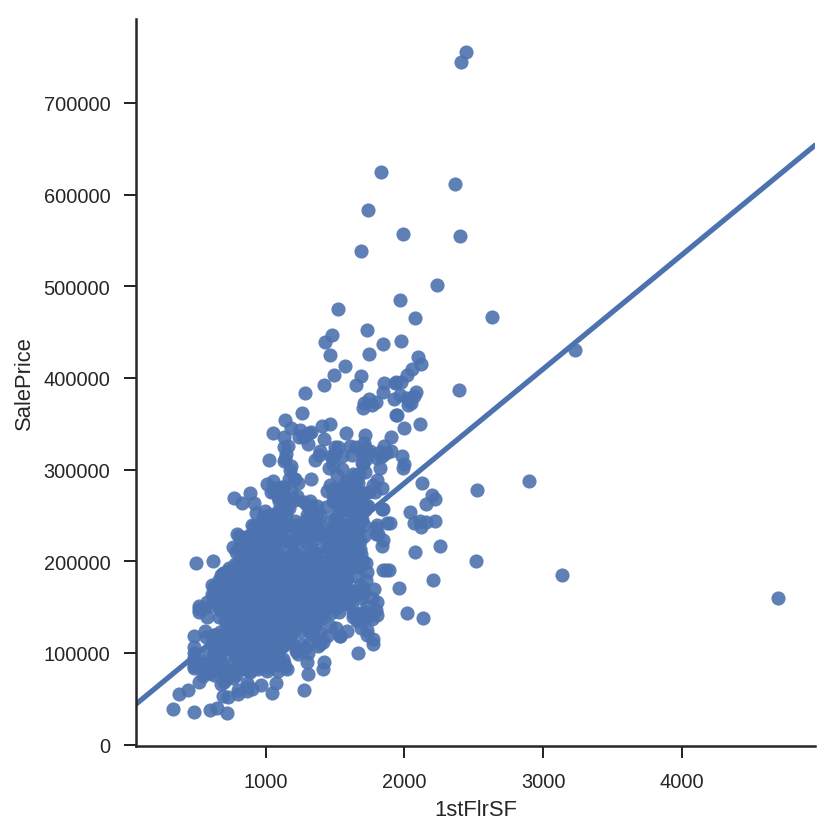

In [63]:
_ = sns.lmplot(x='1stFlrSF', y="SalePrice", data=df, ci=None, 
            palette="muted", size=6, scatter_kws={"s": 50, "alpha": 0.9})

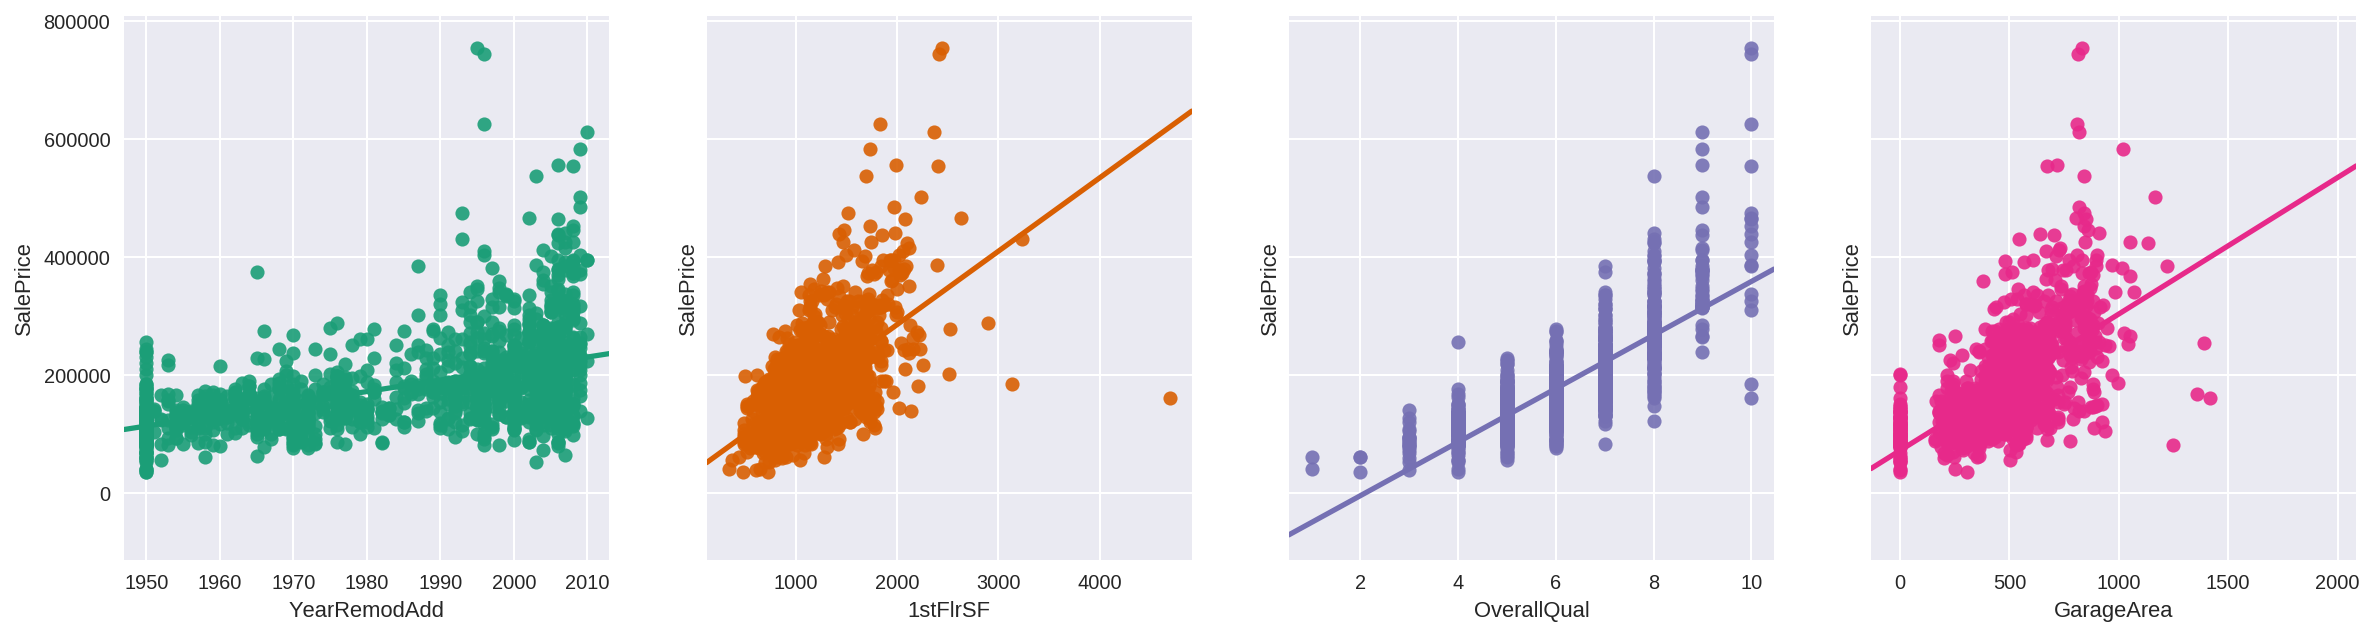

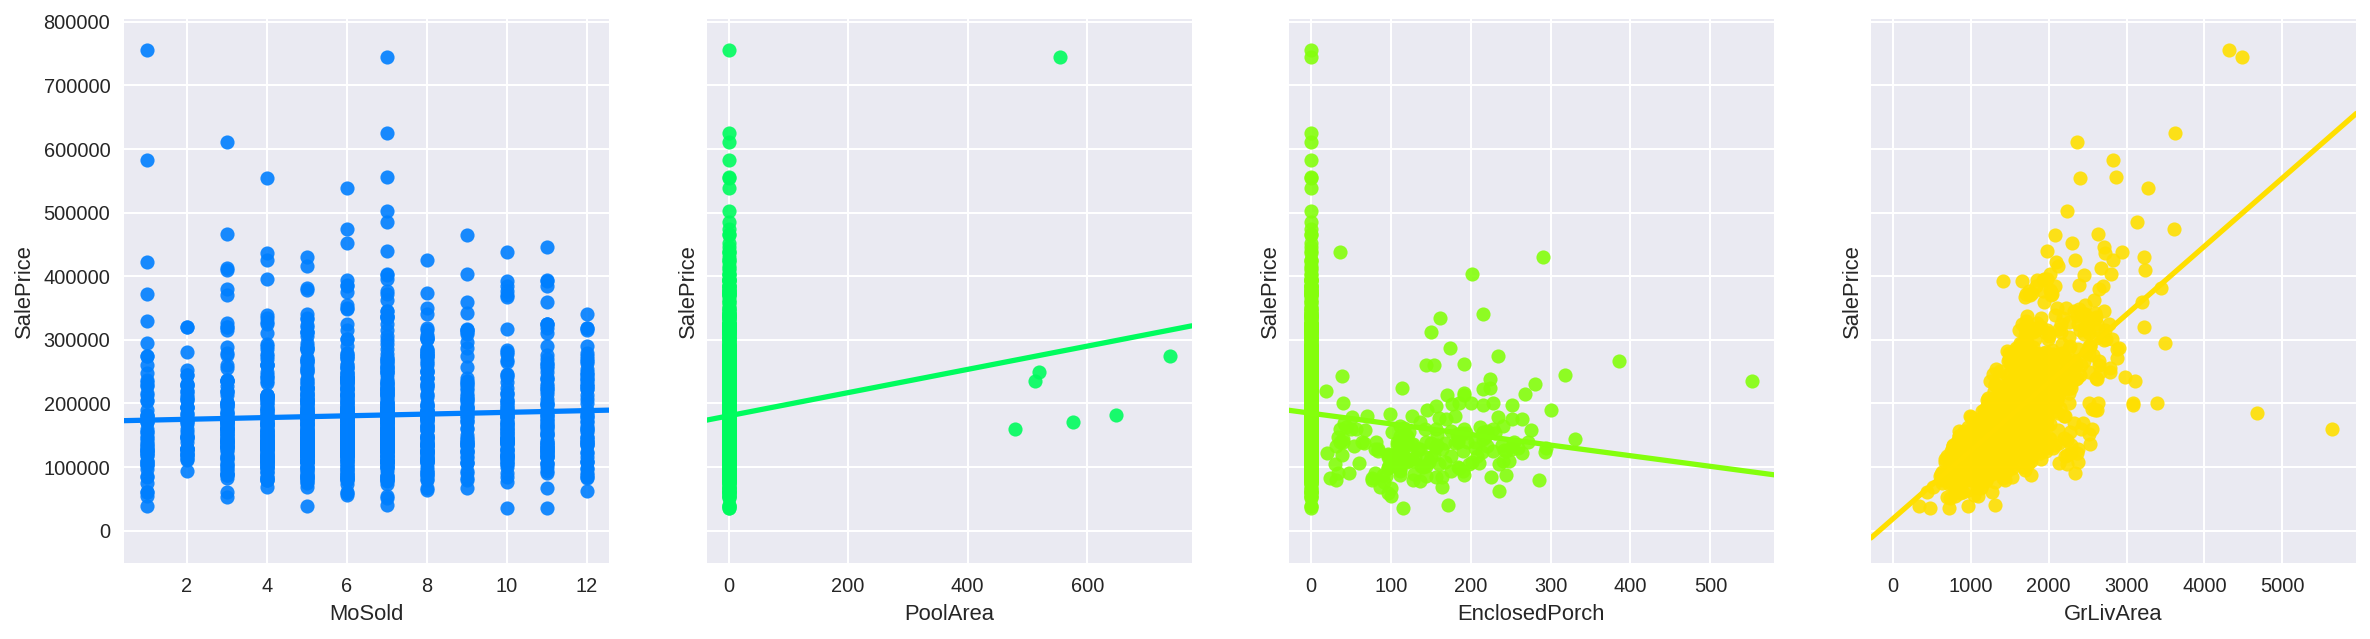

In [64]:
sns.set(palette="Dark2")
f, [ax1, ax2, ax3, ax4] = plt.subplots(1, 4, figsize=(20,5), sharey=True)
sns.regplot(x='YearRemodAdd', y="SalePrice", data=df, ci=None, 
            scatter_kws={"s": 50, "alpha": 0.9},ax=ax1)
sns.regplot(x='1stFlrSF', y="SalePrice", data=df, ci=None, 
            scatter_kws={"s": 50, "alpha": 0.9},ax=ax2)
sns.regplot(x='OverallQual', y="SalePrice", data=df, ci=None, 
            scatter_kws={"s": 50, "alpha": 0.9},ax=ax3)
sns.regplot(x='GarageArea', y="SalePrice", data=df, ci=None, 
            scatter_kws={"s": 50, "alpha": 0.9},ax=ax4)
plt.show()

sns.set(palette="gist_ncar")
f, [ax1, ax2, ax3, ax4] = plt.subplots(1, 4, figsize=(20,5), sharey=True)
sns.regplot(x='MoSold', y="SalePrice", data=df, ci=None, 
            scatter_kws={"s": 50, "alpha": 0.9},ax=ax1)
sns.regplot(x='PoolArea', y="SalePrice", data=df, ci=None, 
            scatter_kws={"s": 50, "alpha": 0.9},ax=ax2)
sns.regplot(x='EnclosedPorch', y="SalePrice", data=df, ci=None, 
            scatter_kws={"s": 50, "alpha": 0.9},ax=ax3)
sns.regplot(x='GrLivArea', y="SalePrice", data=df, ci=None, 
            scatter_kws={"s": 50, "alpha": 0.9},ax=ax4)
plt.show()



### Remove NaN Values and De-Skew
From this point, we will need to process the categorical and numerical features seperately. For the numeric features, we will remove and handle the NaN values that appear in the data. The strategy we use to handle such values is to use the mode of the dataset feature, since most of the distributions of the data are heavily skewed. Following the NaN transformation, we will then de-skew any data that has a skewness over 0.75 with a log-transformation.

In [65]:
# Use sklearn's Imputer library to deal with the NaN values
from sklearn.preprocessing import Imputer
from scipy.stats import skew

# Initialize the Imputer object with the strategy to replace NaN with Mode values
imp = Imputer(strategy='most_frequent')
house_num = pd.DataFrame(imp.fit_transform(house[numeric_cols]),columns=numeric_cols)

print('')
print('-------------Skew Report-------------')
# Skew report after transformation
for feature in numeric_cols:
    if np.abs(skew(house_num[feature])) > 0.75:
        house_num[feature] = house_num[feature].apply(lambda x: np.log(x+1))
        print('')
        print('Feature: {}'.format(feature))
        print('Before Skew: {}'.format(skew(house[feature])))
        print('After Skew: {}'.format(skew(house_num[feature])))



-------------Skew Report-------------

Feature: MSSubClass
Before Skew: 1.4062101115313512
After Skew: 0.2487412176191193

Feature: LotArea
Before Skew: 12.195142125084478
After Skew: -0.13726327193353463

Feature: BsmtFinSF1
Before Skew: 1.6837708962341815
After Skew: -0.6177742838938641

Feature: BsmtUnfSF
Before Skew: 0.9193227015582005
After Skew: -2.18425653050519

Feature: TotalBsmtSF
Before Skew: 1.522688086978629
After Skew: -5.149372577588974

Feature: 1stFlrSF
Before Skew: 1.3753417421837937
After Skew: 0.08003175718429047

Feature: 2ndFlrSF
Before Skew: 0.8121942731961613
After Skew: 0.28934579420210166

Feature: GrLivArea
Before Skew: 1.365155954773434
After Skew: -0.006133943205449232

Feature: KitchenAbvGr
Before Skew: 4.483784093860484
After Skew: 3.865437143533283

Feature: WoodDeckSF
Before Skew: 1.5397916998042025
After Skew: 0.15337880209736926

Feature: OpenPorchSF
Before Skew: 2.361911928568972
After Skew: -0.023373249677216844

Feature: EnclosedPorch
Before Skew:

### Principal Component Analysis
In this step, we calculate the principle components of the numerical features. The principal components that explain the majority of the variance in the data will be added to the dataset as engineered features for the predictive model.

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Scale the data before PCA
scaler = StandardScaler()
X_sc = scaler.fit_transform(house[numeric_cols].drop('SalePrice',axis=1))

# Compute 15 principle components
pca = PCA(n_components=15)

# Transform data and save to DataFrame
df_pc = pd.DataFrame(pca.fit_transform(X_sc),
             columns=['PC_{}'.format(num) for num in range(1,16)])

# Add PCA components to numerical features
house_num = pd.concat([house_num, df_pc],axis=1)

print("The {} principal components explain {} percent of the variance".format(15,
             sum(pca.explained_variance_ratio_)*100))


The 15 principal components explain 88.77809697184418 percent of the variance


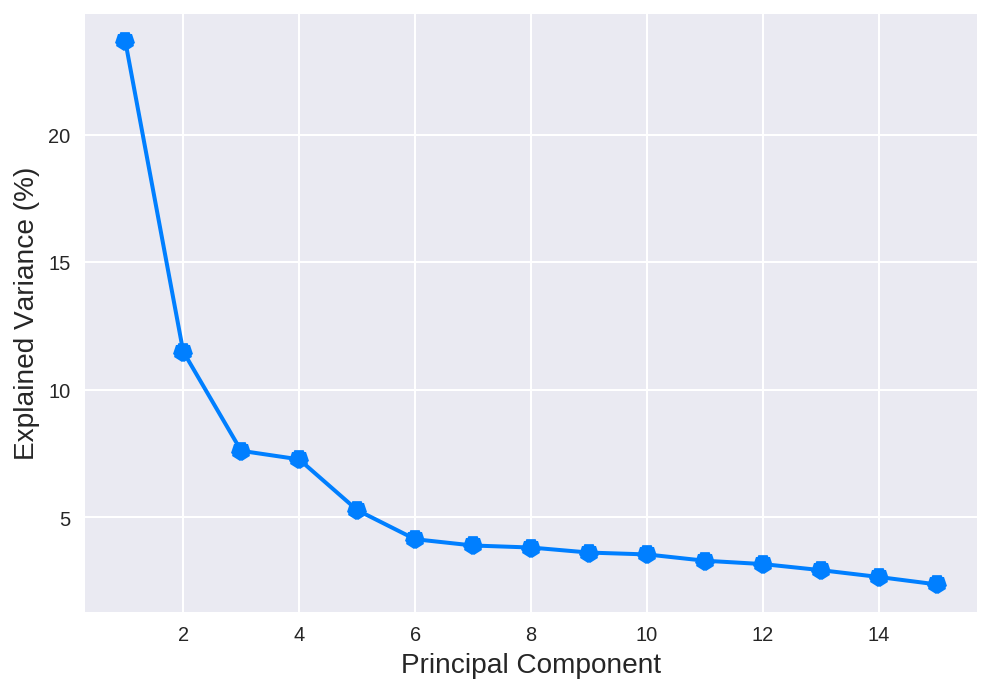

In [96]:
plt.figure()
_ = plt.plot(np.linspace(1,15,15),pca.explained_variance_ratio_*100,'-*',mew=5,lw=2)
_ = plt.xlabel('Principal Component',fontsize=14)
_ = plt.ylabel('Explained Variance (%)',fontsize=14)

### One-hot Encode Categorical Features
For the categorical data, we will one-hot encode the values, which will expand our feature space significantly. Once this is completed, we will combine our numeric and categorical datasets into a single data frame.

In [67]:
# Extract the categorical features
house_cat = house[categorical_cols]

# encode all the categorical features
house_cat = pd.get_dummies(house_cat)

# combine the numeric and categorical features into a single DF
house_df = pd.concat([house_num, house_cat],axis=1)

print('The categorical df shape is: {}'.format(house_cat.shape))
print('The numeric df shape is: {}'.format(house_num.shape))
print('The final df shape is: {}'.format(house_df.shape))

The categorical df shape is: (1460, 252)
The numeric df shape is: (1460, 43)
The final df shape is: (1460, 295)


### Save data

In [68]:
import os
os.getcwd()

'/home/jovyan/Ames-Housing-Data/ipynb'

In [70]:
savepath = '../pkl/house_df_pca.pkl'
if not os.path.exists(savepath):
    house_df.to_pickle(savepath)
else:
    print('File already exists!')

File already exists!
